# ARIMA 
Autoregressive Integrated Moving Average
- ARIMA(p,d,q)
  - p is the order of the autoregressive model
  - d is the degree of differencing
  - q is the order of the moving average model

ARIMA is defined as the sum of the AR(p) and MA(q) models with a degree of differencing d.

# AR vs. MA Models
- AR: A regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
- MA: A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

AR and MA models are both components of the ARIMA model, but they have different characteristics and uses.

AR (Autoregressive) models use past values of the time series to predict future values. The order of the AR model, denoted by p, specifies the number of past values to use in the prediction. An AR model of order p can be written as:

y_t = c + phi_1 * y_{t-1} + phi_2 * y_{t-2} + ... + phi_p * y_{t-p} + e_t

where y_t is the value of the time series at time t, c is a constant, phi_1 to phi_p are the coefficients of the past values, and e_t is the error term.

MA (Moving Average) models use past error terms to predict future values. The order of the MA model, denoted by q, specifies the number of past error terms to use in the prediction. An MA model of order q can be written as:

y_t = c + e_t + theta_1 * e_{t-1} + theta_2 * e_{t-2} + ... + theta_q * e_{t-q}

where y_t is the value of the time series at time t, c is a constant, e_t is the error term at time t, and theta_1 to theta_q are the coefficients of the past error terms.

In summary, AR models use past values of the time series to predict future values, while MA models use past error terms to predict future values. Both AR and MA models can be combined in the ARIMA model to capture the autocorrelation and seasonality of the time series.

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime, timedelta
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:
# Import Live data from Yahoo Finance and save it in a csv file
# Replace 'SPY' with the ticker of your choice

# Define the ticker symbol for SPY
ticker_symbol = "TSLA"

# Set the start date for the data
start_date = "2019-01-31"

# Set the end date to today's date
# end_date = datetime.today().strftime('%Y-%m-%d') #this will pull the data one day less than last trading day.
# end_date = "2024-02-01" # Use this line if you want to get data till specific date

# Calculate the end date as the current date plus one day, this is to ensure that we get data for the current day too.
end_date = (datetime.now() + timedelta(days=1)).strftime("%Y-%m-%d")

# # Use yfinance to get the historical data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

#save the data in a csv file
# df.to_csv('SPY.csv')

# Read the data from the csv file
# df = pd.read_csv('SPY.csv')


# Display the first few rows
print("First few rows:")
print(df.head())

# Display the last few rows
print("\nLast few rows:")
print(df.tail())


[*********************100%%**********************]  1 of 1 completed

First few rows:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-31  20.066668  20.770666  19.600000  20.468000  20.468000  188538000
2019-02-01  20.361334  21.073334  20.233334  20.813999  20.813999  109251000
2019-02-04  20.865334  21.020000  20.125334  20.859333  20.859333  110281500
2019-02-05  20.832666  21.496000  20.816668  21.423332  21.423332  101142000
2019-02-06  21.306000  21.615999  21.041332  21.148001  21.148001   75577500

Last few rows:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-03-04  198.729996  199.750000  186.720001  188.139999  188.139999   
2024-03-05  183.050003  184.589996  177.570007  180.740005  180.740005   
2024-03-06  179.990005  181.580002  173.699997  176.539993  176.539993   
2024-03-07  174.350006  180.039993  173.699997  178.649994 

1285    176.465924
1286    176.366433
1287    176.423813
1288    176.389530
1289    176.409766
1290    176.397772
1291    176.404871
1292    176.400667
1293    176.403156
1294    176.401683
Name: predicted_mean, dtype: float64


<Axes: >

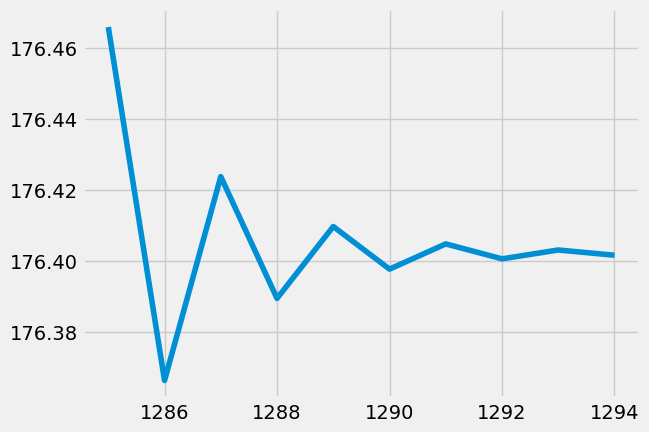

In [4]:
# We'll use the "Clsoe" column as our target variable, so let's rename that column to train our ARIMA model.
# For this example, we'll use an ARIMA(p=2, d=1, q=2) model.
model = ARIMA(df['Close'], order=(2,1,2))

# Fit the model
model = model.fit()

# Make a prediction
prediction = model.forecast(steps=10)

print(prediction)

#plot the prediction
prediction.plot()

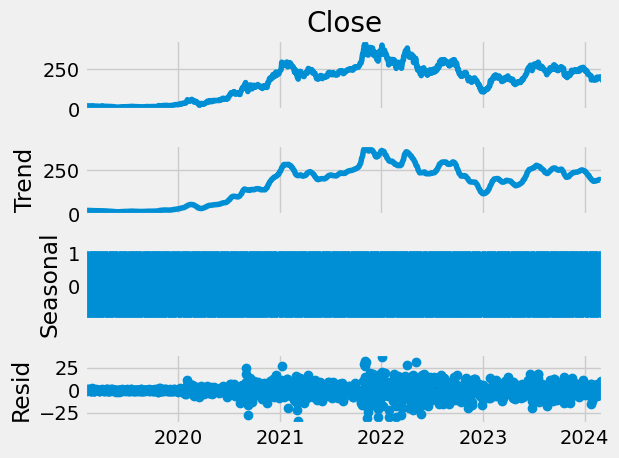

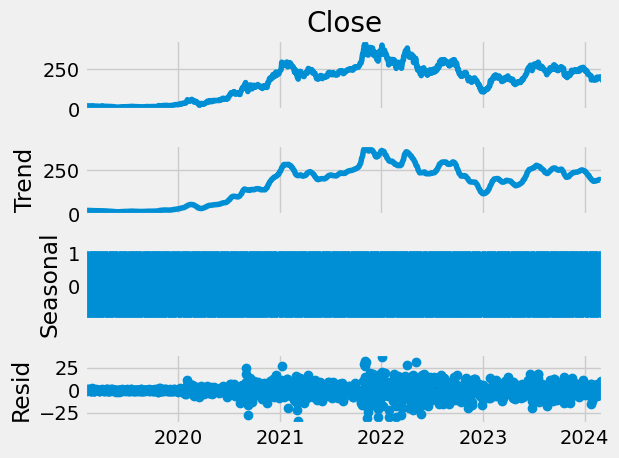

In [5]:
# decompose the time series into trend, seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='additive', period=12)
decomposition.plot()

In [6]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # p-value is less than 0.05 so data is stationary
print(" Is data Stationary ? ", result[1] < 0.05)


ADF Statistic: -1.878726
p-value: 0.342134
 Is data Stationary ?  False


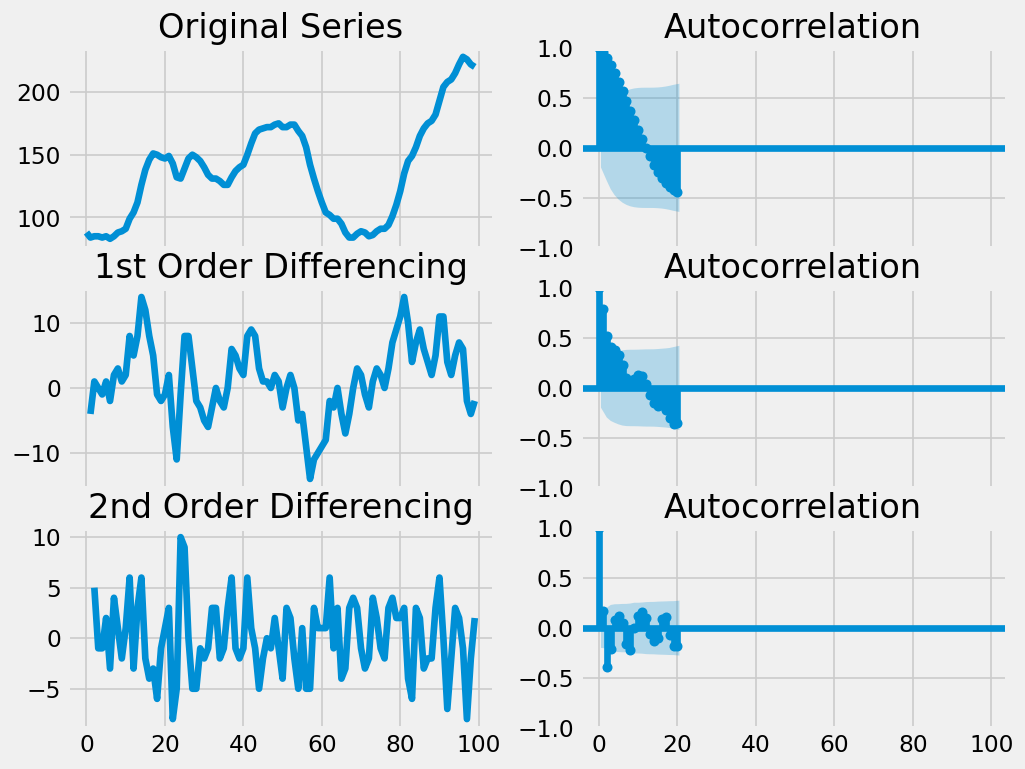

In [7]:

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])



plt.show()

In [8]:
from pmdarima.arima.utils import ndiffs
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2



2

# Introduction to ARIMA Model

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting model that is used to predict future values based on past observations. It is a combination of three components: AutoRegression (AR), Integration (I), and Moving Average (MA).

ARIMA models are widely used in various fields such as finance, economics, engineering, and science to forecast future values of a time series. In this notebook, we will learn how to implement ARIMA model in Python using the `pmdarima` library.
  - p is the order of the autoregressive model
  - d is the degree of differencing
  - q is the order of the moving average model

# Installing Required Libraries

Before we start, we need to install the required libraries. We will be using `pandas`, `numpy`, `matplotlib`, and `pmdarima` libraries in this notebook. You can install them using the following command:





# Importing Required Libraries

Once the libraries are installed, we can import them in our notebook using the following code:



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import auto_arima



# Loading Data

For this notebook, we will be using the `wwwusage.csv` dataset, which contains the number of users accessing a website over time. We can load the data using the following code:



In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value
df.head()

,value
0,88
1,84
2,85
3,85
4,84




# Stationarity Test

Before we can apply ARIMA model to our data, we need to check if the data is stationary or not. Stationarity is an important assumption of ARIMA model, which means that the statistical properties of the time series remain constant over time.

We can check the stationarity of our data using the Augmented Dickey-Fuller (ADF) test, KPSS test, and Phillips-Perron (PP) test. The `ndiffs` function from `pmdarima` library can be used to determine the number of differences required to make the data stationary.



In [11]:
## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2

2



The output of the above code indicates that we need to take two differences to make the data stationary according to ADF and PP tests, and no difference is required according to KPSS test.

# Auto ARIMA Model

Once we have determined the number of differences required to make the data stationary, we can apply the ARIMA model to our data. The `auto_arima` function from `pmdarima` library can be used to automatically select the best ARIMA model based on the AIC (Akaike Information Criterion) value.



In [12]:
model = auto_arima(y, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=496.268, Time=0.06 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=515.970, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=513.581, Time=0.05 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=488.108, Time=0.08 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=510.539, Time=0.02 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=506.329, Time=0.05 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=487.851, Time=0.11 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=509.857, Time=0.02 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=505.849, Time=0.08 sec
 ARIMA(1,2,1)(1,1,2)[12]             : AIC=inf, Time=



The above code fits an ARIMA model to our data using the `auto_arima` function. The `start_p`, `start_q`, `max_p`, and `max_q` parameters define the range of AR and MA terms to consider. The `m` parameter defines the number of observations per season. The `start_P` parameter defines the range of seasonal AR terms to consider. The `d` and `D` parameters define the number of non-seasonal and seasonal differences, respectively. The `trace` parameter prints the progress of the model fitting process. The `error_action` parameter defines the action to take if an error occurs during the model fitting process. The `suppress_warnings` parameter suppresses the warnings during the model fitting process. The `stepwise` parameter performs a stepwise search for the best model.

# Model Summary

Once the model is fitted, we can print the summary of the model using the `summary` method.



In [13]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  100
Model:             SARIMAX(2, 2, 0)x(0, 1, [1], 12)   Log Likelihood                -234.012
Date:                              Fri, 08 Mar 2024   AIC                            476.025
Time:                                      14:58:24   BIC                            485.842
Sample:                                           0   HQIC                           479.976
                                              - 100                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2603      0.103      2.537      0.011       0.059       0.461
ar.L2         -0.47



The output of the above code will display the summary of the ARIMA model, which includes the coefficients, standard errors, t-values, and p-values of the model.

# Forecasting

Once the model is fitted, we can use it to forecast future values of the time series. The `predict` method can be used to generate the forecasts.



In [14]:
forecast = model.predict(n_periods=12)



The above code generates 12 future values of the time series.

# Plotting Results

Finally, we can plot the original time series, the fitted values, and the forecasts using the following code:



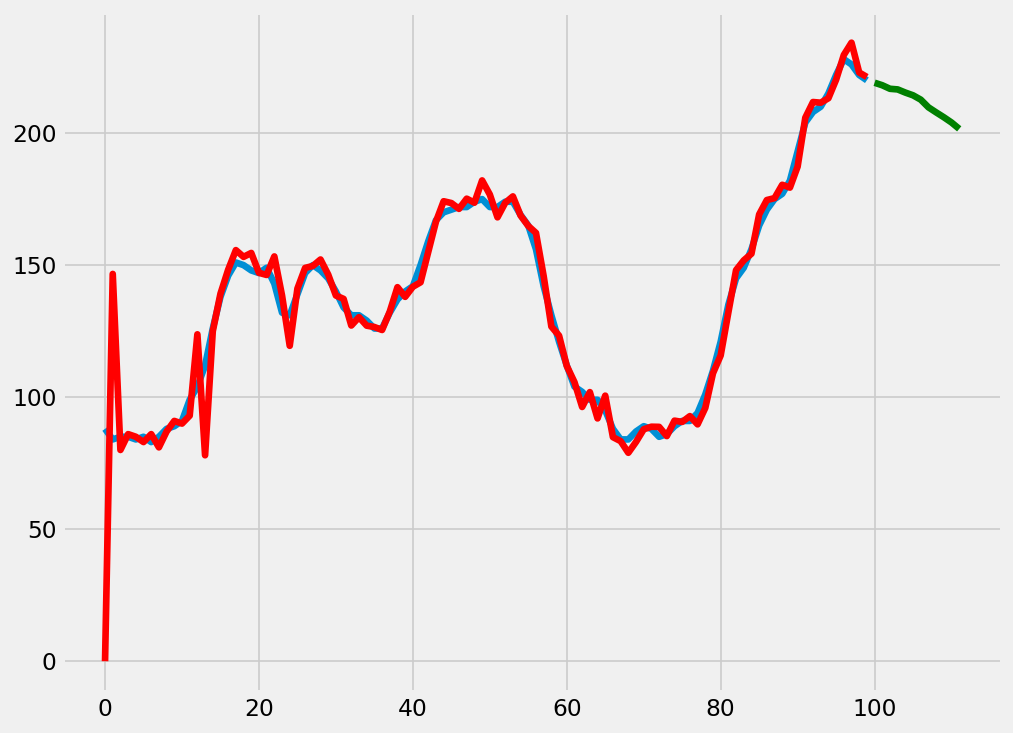

In [15]:
plt.plot(y)
plt.plot(model.predict_in_sample(), color='red')
plt.plot(forecast, color='green')
plt.show()



The above code will display a plot of the original time series, the fitted values, and the forecasts.

# Conclusion

In this notebook, we learned how to implement ARIMA model in Python using the `pmdarima` library. We loaded the data, checked the stationarity of the data, fitted the ARIMA model, generated the forecasts, and plotted the results. ARIMA model is a powerful tool for time series forecasting and can be used in various fields to predict future values of a time series.

# Model Evaluation

There are several ways to evaluate the performance of an ARIMA model. Here are some common methods:

1. Mean Absolute Error (MAE): This measures the average absolute difference between the actual and predicted values. A lower MAE indicates better performance.

2. Mean Squared Error (MSE): This measures the average squared difference between the actual and predicted values. A lower MSE indicates better performance.

3. Root Mean Squared Error (RMSE): This measures the square root of the average squared difference between the actual and predicted values. A lower RMSE indicates better performance.

4. Mean Absolute Percentage Error (MAPE): This measures the average percentage difference between the actual and predicted values. A lower MAPE indicates better performance.

5. Symmetric Mean Absolute Percentage Error (SMAPE): This measures the average percentage difference between the actual and predicted values, but it is symmetric around zero. A lower SMAPE indicates better performance.

You can use these metrics to evaluate the performance of your ARIMA model. You can calculate these metrics using the actual and predicted values of the time series. Here's an example code to calculate these metrics:



In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y, model.predict_in_sample())
print('MAE:', mae)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, model.predict_in_sample())
print('MSE:', mse)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y - model.predict_in_sample()) / y)) * 100
print('MAPE:', mape)

# Calculate the symmetric mean absolute percentage error (SMAPE)
smape = np.mean(2.0 * np.abs(model.predict_in_sample() - y) / (np.abs(y) + np.abs(model.predict_in_sample()))) * 100
print('SMAPE:', smape)

MAE: 4.8221371375109765
MSE: 145.17672468124022
RMSE: 12.048930437231357
MAPE: 4.4061395025812
SMAPE: 5.248885282390885




This code calculates the MAE, MSE, RMSE, MAPE, and SMAPE metrics for the ARIMA model. You can use these metrics to compare the performance of different ARIMA models or to evaluate the performance of your model over time.

# ARIMA vs SARIMA

ARIMA (Autoregressive Integrated Moving Average) and SARIMA (Seasonal Autoregressive Integrated Moving Average) models are both time series models that are used to forecast future values of a time series based on its past values. The main difference between the two models is that SARIMA models are designed to handle time series data with seasonal patterns, while ARIMA models are designed for non-seasonal time series data.

ARIMA models are based on three parameters: p, d, and q. The p parameter represents the number of autoregressive terms, the d parameter represents the number of differences needed to make the time series stationary, and the q parameter represents the number of moving average terms. ARIMA models are used to model non-seasonal time series data.

SARIMA models are based on six parameters: p, d, q, P, D, and Q. The additional three parameters (P, D, and Q) represent the seasonal autoregressive, seasonal difference, and seasonal moving average terms, respectively. SARIMA models are used to model time series data with seasonal patterns.

In summary, ARIMA models are used for non-seasonal time series data, while SARIMA models are used for time series data with seasonal patterns. SARIMA models are an extension of ARIMA models that include additional parameters to handle seasonal patterns in the data.

## Introduction to SARIMA

SARIMA (Seasonal Autoregressive Integrated Moving Average) is a time series model that is used to forecast future values of a time series based on its past values. SARIMA is an extension of ARIMA (Autoregressive Integrated Moving Average) that includes additional parameters to handle seasonal patterns in the data.

SARIMA models are based on six parameters: p, d, q, P, D, and Q. The p parameter represents the number of autoregressive terms, the d parameter represents the number of differences needed to make the time series stationary, and the q parameter represents the number of moving average terms. The additional three parameters (P, D, and Q) represent the seasonal autoregressive, seasonal difference, and seasonal moving average terms, respectively.

## How SARIMA works

SARIMA works by modeling the time series data as a combination of autoregressive, moving average, and seasonal components. The autoregressive component models the relationship between the current value of the time series and its past values. The moving average component models the relationship between the current value of the time series and its past errors. The seasonal component models the relationship between the current value of the time series and its past seasonal values.

SARIMA models are typically fitted to the time series data using the maximum likelihood estimation method. The fitted model can then be used to make predictions on new data.

## Implementing SARIMA in Python

SARIMA can be implemented in Python using the `statsmodels` library. Here's an example code that demonstrates how to implement SARIMA in Python:



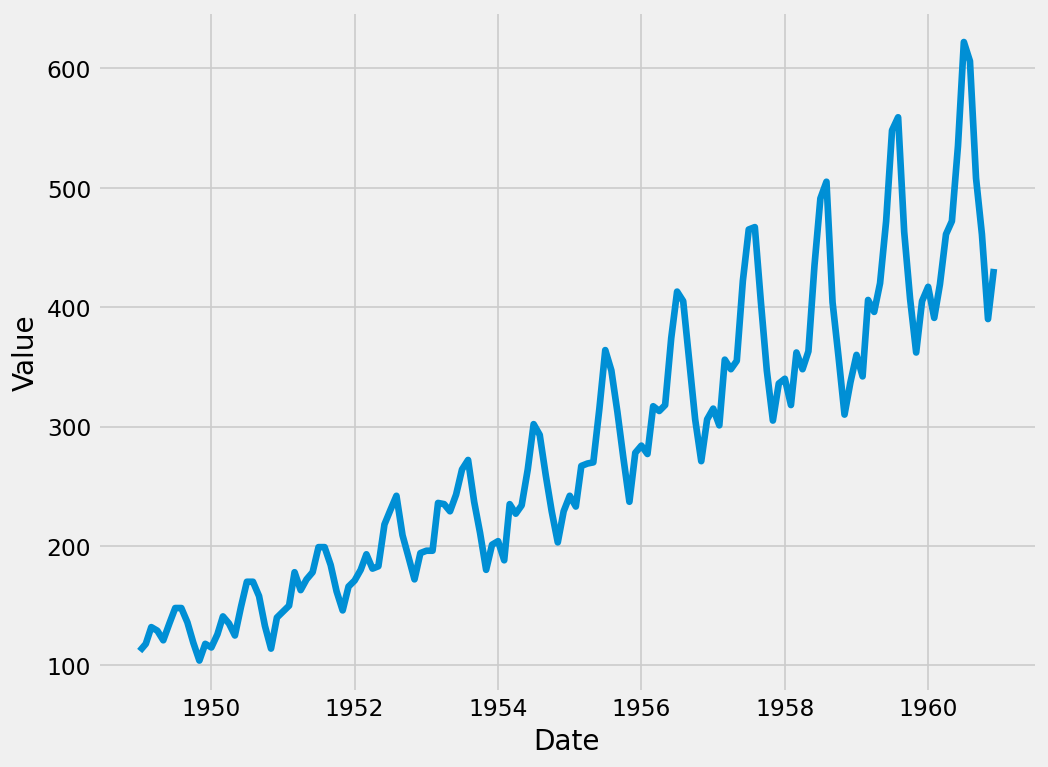

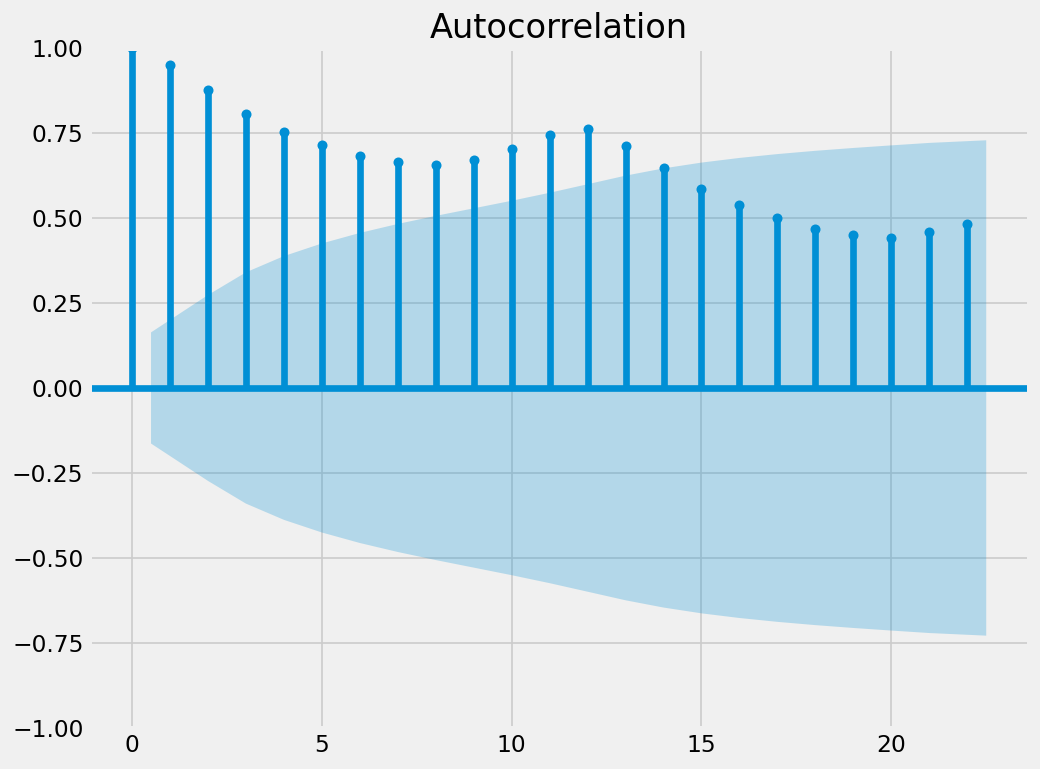

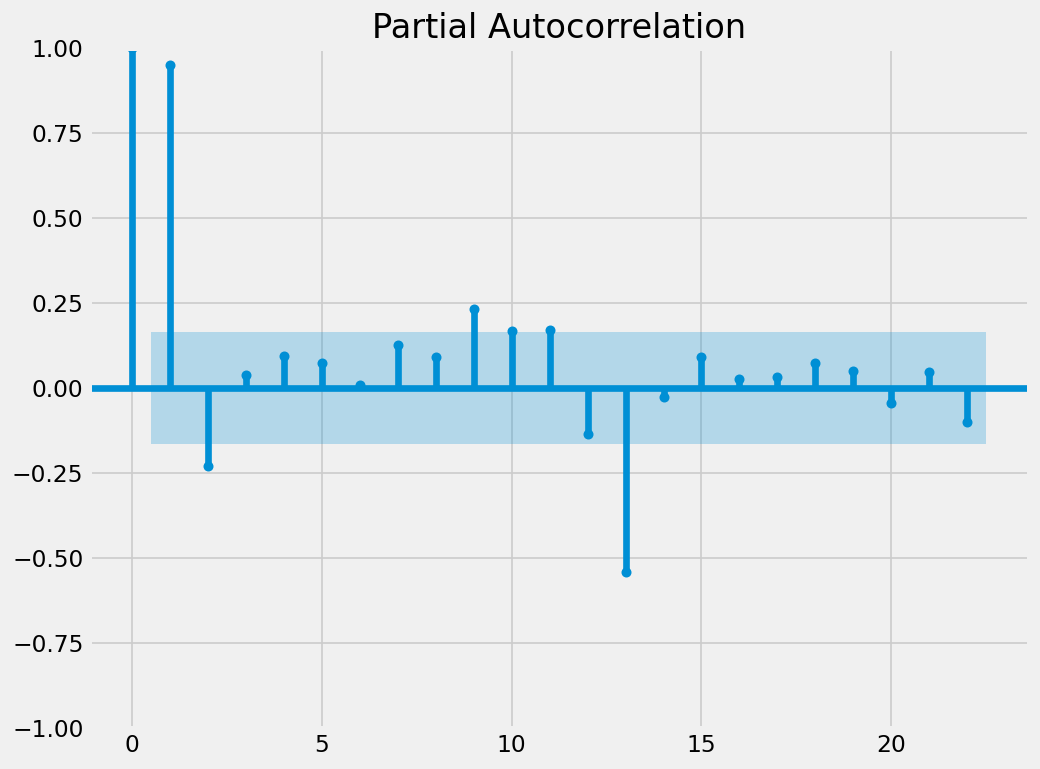

                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Fri, 08 Mar 2024   AIC                           1022.299
Time:                                    14:58:25   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the time series data
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

# Plot the time series data
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Plot the autocorrelation and partial autocorrelation functions
plot_acf(df)
plot_pacf(df)
plt.show()

# Define the SARIMA model parameters
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
m = 12

# Fit the SARIMA model to the data
model = SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, m))
results = model.fit()

# Print the model summary
print(results.summary())

# Make predictions on new data
forecast = results.forecast(steps=12)
print(forecast)



In this code, we first load the time series data from a CSV file and plot it. We then plot the autocorrelation and partial autocorrelation functions to determine the values of the p, d, and q parameters.

We then define the SARIMA model parameters and fit the model to the data using the `SARIMAX` class. We print the model summary to see the values of the estimated parameters. Finally, we make predictions on new data using the `forecast` method.

## Conclusion

SARIMA is a powerful time series model that can be used to forecast future values of a time series based on its past values. SARIMA models are an extension of ARIMA models that include additional parameters to handle seasonal patterns in the data. SARIMA can be implemented in Python using the `statsmodels` library.